# 24. 앙상블

## 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등

#### 보팅: 
- 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

#### 배깅
- bagging은 bootstrap aggregating의 줄임말
- bootstrap:모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본(샘플)에 대해서, 그 샘플에서 또 다시 샘플(재표본)을 여러번(1,000~10,000번, 혹은 그 이상)추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.(위키피디아)
- 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식
- 이 때의 데이터 샘플은 중첩이 허용된다. 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때,각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있다. 배깅의 대표적인 방식이 Random Forest

#### 부스팅:
- 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 
그 다음번 알고리즘에 가중치(Ada)를 부여하여 학습과 예측을 진행하는 방식
잔여오차를 다시학습(gradient)



( 부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음)
- AdaBoost
- Gradient Booting Machine(GBM)
- XGBoost
- LightGBM
- CatBoost


In [117]:
import pandas as pd

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer, load_wine, make_classification, load_iris, fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer


from xgboost import XGBClassifier
import math
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

## voting

In [2]:
from sklearn.ensemble import VotingClassifier
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
x_data = cancer['data']
y_data = cancer['target']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, 
                                                    stratify = y_data, random_state = 1)

In [6]:
model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()

In [7]:
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)])

In [8]:
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier())])

In [9]:
model_vote.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1])

In [10]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1])

In [11]:
model_vote.score(x_test, y_test)

0.956140350877193

In [12]:
for c in [model_logi, model_knn, model_tree] :
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))

LogisticRegression 0.956140350877193
KNeighborsClassifier 0.956140350877193
DecisionTreeClassifier 0.9649122807017544


### voting에 사용한 세 모델의 각각의 점수보다 앙상블 모델의 점수가 더 높은것을 볼 수 있다.

## 와인데이터셋에 대해 3개의 분류 클래스를 이용하고 soft voting으로 정확도를 구하시오

In [13]:
wine = load_wine()

In [14]:
x_data = wine['data']
y_data = wine['target']

In [15]:
x_data = pd.DataFrame(x_data, columns = wine['feature_names'])

In [16]:
x_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, 
                                                    stratify = y_data, random_state = 1)

In [18]:
model_logi = make_pipeline( StandardScaler(), LogisticRegression() )
model_knn = make_pipeline( StandardScaler(), KNeighborsClassifier() )
model_tree = make_pipeline( StandardScaler(), DecisionTreeClassifier() )

In [19]:
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)], voting = 'soft')

In [20]:
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier())])),
                             ('tree',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier())]))],
                 voting='soft')

In [21]:
for c in [model_logi, model_knn, model_tree] :
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))

Pipeline 0.9722222222222222
Pipeline 0.9722222222222222
Pipeline 0.9166666666666666


In [22]:
model_vote.score(x_test, y_test)

1.0

## Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_wine
wine = load_wine()
x_data = wine['data']
y_data = wine['target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                    stratify=y_data, random_state=1 )

In [24]:
model_knn = KNeighborsClassifier()

In [25]:
model_bagg = BaggingClassifier( model_knn, n_estimators = 10, max_samples = 0.5 )
model_bagg.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5)

In [26]:
model_bagg.predict(x_test)

array([2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0])

In [27]:
x_train.shape

(142, 13)

## random forest(decision tree + bagging)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier()

In [30]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
forest.predict(x_test)

array([1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0])

In [32]:
forest.score(x_test, y_test)

1.0

## boost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [35]:
model_ada.predict(x_test)

array([1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0])

In [36]:
model_ada.score(x_test, y_test)

0.9166666666666666

In [37]:
models= [('ada',AdaBoostClassifier()),
         ('bc', BaggingClassifier() ),
         ('logi', LogisticRegression() ),
         ('tree',DecisionTreeClassifier() ),
         ('knn', KNeighborsClassifier() )
        ]

model_vote= VotingClassifier( models, voting='soft' )
model_vote.fit( x_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('bc', BaggingClassifier()),
                             ('logi', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

### xgboost

In [38]:
from xgboost import XGBClassifier

In [39]:
xg = XGBClassifier()

# 25. XOR

In [40]:
x_data = np.array( [[0,0],[0,1],[1,0],[1,1]])
y_data = np.array( [0,1,1,0])

In [41]:
model_logi = LogisticRegression(max_iter = 1000, verbose = 1)
model_logi.fit(x_data, y_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=1)

In [42]:
model_logi.coef_

array([[0., 0.]])

In [43]:
model_logi.intercept_

array([0.])

In [44]:
model_logi.predict(x_data)

array([0, 0, 0, 0])

In [45]:
model_logi.score(x_data, y_data)

0.5

# 딥러닝 라이브러리

In [46]:
from sklearn.neural_network import MLPRegressor

In [47]:
model_mlp = MLPRegressor(hidden_layer_sizes=(200, ),max_iter = 1000)  # 2x200  200x1

In [48]:
model_mlp.fit(x_data, y_data)

MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000)

In [49]:
model_mlp.predict(x_data)

array([0.05231903, 0.9569773 , 0.95319371, 0.04856408])

In [50]:
model_mlp.coefs_

[array([[ 3.15483882e-02, -2.72502343e-06,  5.40118562e-08,
         -1.20630800e-04, -1.23026606e-02,  1.50073039e-01,
         -2.10520198e-09, -1.76067013e-03, -1.71273576e-04,
         -2.48609213e-01, -1.68719881e-01,  1.08335307e-01,
         -1.18827957e-06, -2.99743286e-02, -1.26689650e-01,
         -6.62317437e-03,  2.40411484e-01,  5.15863559e-02,
          1.47015694e-04,  2.59049803e-01, -8.68305271e-08,
          8.13013277e-02, -1.17220317e-01,  2.66623114e-01,
          2.81953270e-01, -2.43521132e-02,  1.33464829e-01,
         -6.70774987e-02,  4.23462288e-02, -7.75441396e-02,
          1.74316458e-01, -1.30973712e-02, -6.33292366e-09,
          9.00319769e-07, -9.05034244e-08,  1.12407075e-01,
          1.60376014e-01,  5.05510950e-08,  1.29313093e-01,
          2.97807796e-07,  3.34521732e-04,  2.41252203e-01,
          6.66254064e-07, -4.19255643e-02, -2.98435557e-03,
          1.37636438e-01, -6.52250962e-02, -1.76363340e-01,
          1.10047268e-01, -1.82067311e-0

In [51]:
model_mlp.coefs_[0].shape

(2, 200)

In [52]:
model_mlp.coefs_[1].shape

(200, 1)

In [53]:
a = np.matmul(x_data, model_mlp.coefs_[0])  # 4x2  2x200
b = np.matmul(a, model_mlp.coefs_[1])       # 4x100 100x1

In [54]:
print(a.shape)
print(b.shape)

(4, 200)
(4, 1)


In [55]:
model_mlp2 = MLPRegressor(hidden_layer_sizes=(200, 4), max_iter = 1000)
model_mlp2.fit(x_data, y_data)

MLPRegressor(hidden_layer_sizes=(200, 4), max_iter=1000)

In [56]:
model_mlp2.coefs_[0].shape

(2, 200)

In [57]:
model_mlp2.coefs_[1].shape

(200, 4)

In [58]:
model_mlp2.coefs_[2].shape

(4, 1)

In [59]:
model_mlp2.predict(x_data)   # 4x2  2x200 = > 4x200  200x4 ==> 4x4  4x1 ===> 4x1

array([-0.06909449, -0.06909449, -0.06909449, -0.06909449])

아이리스 데이터를 딥러닝으로 분류를 수행하시오
히든레이어는 총 5개( 4x64, 64x32, 32x16, 16x1 )를 두고 1000번 학습을 진행하시오
4.9, 3.0, 1.4, 0.2에 대한 종분류를 예측하시오

In [60]:
iris = load_iris()

In [61]:
x_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y_data = iris['target']
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16),max_iter = 1000)  # 2x200  200x1

In [63]:
model_mlp.fit(x_data, y_data)

MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000)

In [64]:
model_mlp.coefs_[0].shape

(4, 64)

In [65]:
model_mlp.coefs_[1].shape

(64, 32)

In [66]:
model_mlp.coefs_[2].shape

(32, 16)

In [67]:
model_mlp.coefs_[3].shape

(16, 3)

In [68]:
model_mlp.predict([[4.9, 3.0, 1.4, 0.2]])

array([0])

In [69]:
# 아이리스 데이터를 딥러닝으로 분류를 수행하시오
# 히든레이어는 총 5개( 4x64, 64x32, 32x16, 16x1 )를 두고 1000번 학습을 진행하시오
# 4.9, 3.0, 1.4, 0.2에 대한 종분류를 예측하시오
from sklearn.datasets import load_breast_cancer, load_wine, make_classification, load_iris
iris = load_iris()
x_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y_data = iris['target']

model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16),max_iter = 1000) 
model_mlp.fit(x_data, y_data)
model_mlp.predict([[4.9, 3.0, 1.4, 0.2]])


array([0])

In [70]:

from sklearn.datasets import load_iris
iris = load_iris()

x_data = iris.data
y_data = iris.target

x_train, x_test, y_train,y_test = train_test_split(x_data, y_data, stratify= y_data, test_size = 0.2, random_state=2021)

model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(64,32,16),max_iter = 2000))
model.fit(x_train,y_train)

print('train score :',model.score(x_train,y_train))
print('test score :', model.score(x_test,y_test))


print('\n예측결과')
iris.target_names[model.predict([[4.9,3.0,1.4,0.2]])]

train score : 0.9916666666666667
test score : 0.9

예측결과


array(['setosa'], dtype='<U10')

# 26. 이미지분류(MLPCLASSFIER)

In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import fetch_openml

import warnings
warnings.simplefilter('ignore')

In [72]:
mnist = fetch_openml('mnist_784')

In [73]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [74]:
x_data = mnist.data
y_data = mnist.target

x_data.shape

(70000, 784)

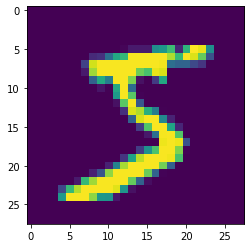

In [75]:
x_data.iloc[0].values.reshape(28,28)

plt.imshow( x_data.iloc[0].values.reshape(28,28) )
plt.show()

In [76]:
y_data[0]

'5'

In [77]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size = 0.2, stratify = y_data)

In [78]:
model = MLPClassifier( hidden_layer_sizes=(64, 32), verbose = 1, max_iter = 100)
model.fit(x_train, y_train)

Iteration 1, loss = 2.93025607
Iteration 2, loss = 0.67086006
Iteration 3, loss = 0.46611174
Iteration 4, loss = 0.36754288
Iteration 5, loss = 0.29864283
Iteration 6, loss = 0.25321954
Iteration 7, loss = 0.21757070
Iteration 8, loss = 0.19481811
Iteration 9, loss = 0.17882632
Iteration 10, loss = 0.16076155
Iteration 11, loss = 0.14586112
Iteration 12, loss = 0.13597294
Iteration 13, loss = 0.12153950
Iteration 14, loss = 0.11779648
Iteration 15, loss = 0.10827180
Iteration 16, loss = 0.10696698
Iteration 17, loss = 0.10295941
Iteration 18, loss = 0.09284147
Iteration 19, loss = 0.09031238
Iteration 20, loss = 0.09092142
Iteration 21, loss = 0.08457477
Iteration 22, loss = 0.07858970
Iteration 23, loss = 0.07990603
Iteration 24, loss = 0.07634139
Iteration 25, loss = 0.06819677
Iteration 26, loss = 0.06609467
Iteration 27, loss = 0.06357478
Iteration 28, loss = 0.06172676
Iteration 29, loss = 0.06126718
Iteration 30, loss = 0.05855054
Iteration 31, loss = 0.05327481
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, verbose=1)

In [79]:
model.score(x_test, y_test)

0.9714285714285714

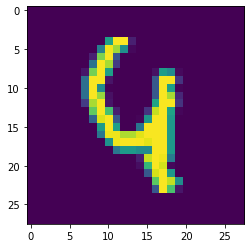

In [80]:
plt.imshow( x_test.iloc[0].values.reshape(28, 28) )
plt.show()

## 팀과제

- feature : pclass, sex, fare
- label : survived
    
1. 1등급, female, 32달러 인 경우 생사유무를 예측하시오(voting, bagging, boost, deep learning)
2. 위의 모델의 train, test, f1 score를 구하시오
3. confusion matrix 를 구하고 heatmap을 그리시오
4. roc curve를 그리시오

In [ ]:
## voting

In [178]:
import seaborn as sns

In [179]:
titanic = sns.load_dataset('titanic')

In [180]:
x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic[['survived']]

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, stratify = y_data, random_state = 1)

In [182]:
y_test

,survived
391,1
584,0
610,0
261,1
496,1
...,...
434,0
331,0
559,1
376,1


In [183]:
x_data

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500
...,...,...,...
886,2,male,13.0000
887,1,female,30.0000
888,3,female,23.4500
889,1,male,30.0000


In [184]:
mct = make_column_transformer(  ( OneHotEncoder(), ['sex'] ) )
model_logi = make_pipeline( mct, StandardScaler(), LogisticRegression() )
model_knn = make_pipeline( mct, StandardScaler(), KNeighborsClassifier() )
model_tree = make_pipeline( mct, StandardScaler(), DecisionTreeClassifier() )

In [185]:
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)], voting = 'soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('onehotencoder',
                                                                                OneHotEncoder(),
                                                                                ['sex'])])),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('onehotencoder',
                                                                                OneHotEncoder(),
                                   

In [186]:
q1 = pd.DataFrame([1, 'female', 32]).T
q1.columns = x_data.columns

print('1등급, female, 32달러인 사람의 voting 생존여부는', model_vote.predict(q1)[0],'로 생존할 가능성이 크다.')

1등급, female, 32달러인 사람의 voting 생존여부는 1 로 생존할 가능성이 크다.


In [187]:
## 2. train, test, f1 score
print('voting train f1 score : ', metrics.f1_score(y_train, model_vote.predict(x_train), average='macro'))
print('voting test f1 score : ', metrics.f1_score(y_test, model_vote.predict(x_test), average='macro'))

voting train f1 score :  0.7647319920876151
voting test f1 score :  0.7888984509466437


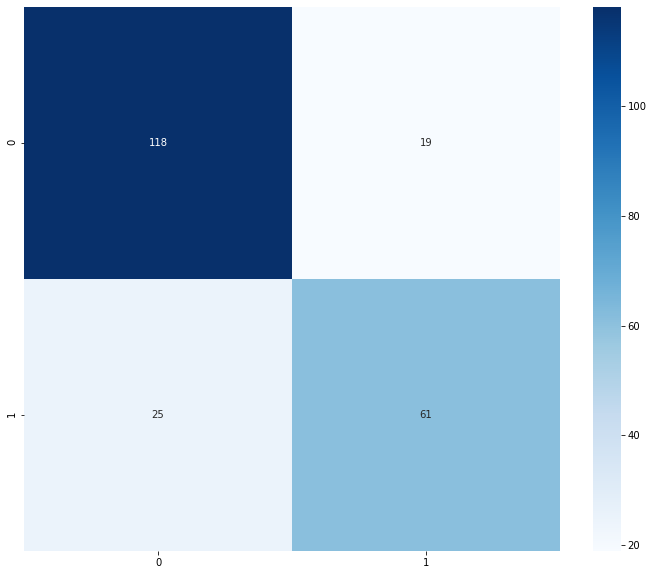

In [188]:
## 3. confusion matrix, heatmap
cm = confusion_matrix(y_test, model_vote.predict(x_test))
plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d')
plt.show()

In [189]:
y_test

,survived
391,1
584,0
610,0
261,1
496,1
...,...
434,0
331,0
559,1
376,1


,survived,proba
391,1,0.195912
584,0,0.195912
610,0,0.689633
261,1,0.195912
496,1,0.689633
...,...,...
434,0,0.195912
331,0,0.195912
559,1,0.689633
376,1,0.689633


[0.         0.13868613 1.        ]
[0.         0.70930233 1.        ]
[1.68963341 0.68963341 0.19591194]


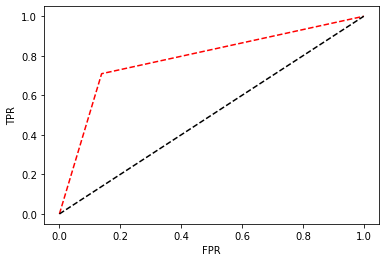

In [190]:
## 4. roc_curve
from sklearn.metrics import roc_curve
p = model_vote.predict_proba(x_test)
y_test_cp = y_test.copy()
df = pd.DataFrame( y_test_cp )
df['proba'] = p[:, 1]
display(df)
fpr, tpr, thresholds = roc_curve(y_test.values, df['proba'])
print(fpr)
print(tpr)
print(thresholds)
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [174]:
p[: 1]

array([0.19591194, 0.19591194, 0.68963341, 0.19591194, 0.68963341,
       0.19591194, 0.19591194, 0.19591194, 0.19591194, 0.19591194,
       0.19591194, 0.68963341, 0.68963341, 0.19591194, 0.19591194,
       0.68963341, 0.19591194, 0.68963341, 0.19591194, 0.19591194,
       0.68963341, 0.19591194, 0.68963341, 0.68963341, 0.19591194,
       0.19591194, 0.19591194, 0.68963341, 0.19591194, 0.19591194,
       0.68963341, 0.19591194, 0.68963341, 0.19591194, 0.19591194,
       0.68963341, 0.19591194, 0.19591194, 0.68963341, 0.19591194,
       0.68963341, 0.68963341, 0.19591194, 0.68963341, 0.68963341,
       0.68963341, 0.68963341, 0.19591194, 0.19591194, 0.68963341,
       0.68963341, 0.19591194, 0.19591194, 0.19591194, 0.19591194,
       0.19591194, 0.19591194, 0.68963341, 0.19591194, 0.19591194,
       0.19591194, 0.19591194, 0.68963341, 0.19591194, 0.68963341,
       0.19591194, 0.19591194, 0.68963341, 0.19591194, 0.68963341,
       0.68963341, 0.68963341, 0.68963341, 0.19591194, 0.19591

In [169]:
y_test

,survived
391,1
584,0
610,0
261,1
496,1
...,...
434,0
331,0
559,1
376,1
